In [185]:
import numpy as np
import matplotlib.pyplot as plt


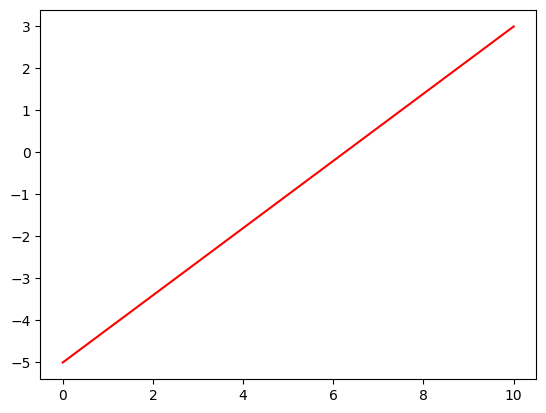

In [186]:
x = np.linspace(0,10,50)
y = 0.8 * x -5
plt.plot(x,y,color='red')

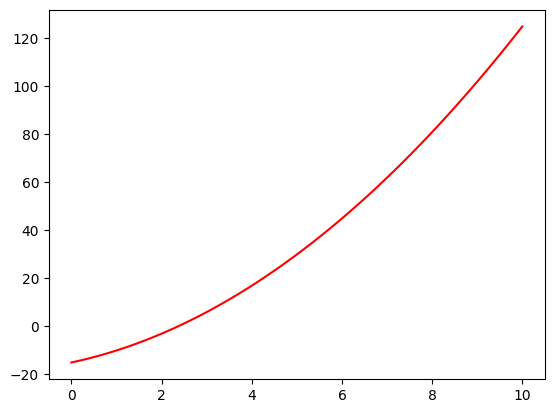

In [187]:
y = x ** 2 + 4 * x -15
plt.plot(x,y,color='red')

In [188]:
#正规方程 二元一次方程
x = np.array([[1,1],
              [2,-1]
             ])
x

array([[ 1,  1],
       [ 2, -1]])

In [189]:
y = np.array([14,10])
np.linalg.solve(x,y)

array([8., 6.])

W = (X^T X)^{-1} X^T y

In [190]:
a = x.T.dot(x)

In [191]:
#求逆矩阵
b = np.linalg.inv(a)
b

array([[0.22222222, 0.11111111],
       [0.11111111, 0.55555556]])

In [192]:
c = b.dot(x.T)
c

array([[ 0.33333333,  0.33333333],
       [ 0.66666667, -0.33333333]])

In [193]:
c.dot(y)

array([8., 6.])

In [194]:
#三元一次方程
x = np.array([[1,-1,1],
              [2,1,-1],
              [3,-2,6]])
y = np.array([100,80,256])


In [195]:
w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
w

array([ 60., -41.,  -1.])

In [196]:
# 八元一次方程对应的X数据
x = np.array([
    [0,14,8,0,5,-2,9,-3],
    [-4,10,6,4,-14,-2,-14,8],
    [-1,-6,5,-12,3,-3,2,-2],
    [5,-2,3,10,5,11,4,-8],
    [-15,-15,-8,-15,7,-4,-12,2],
    [11,-10,-2,4,3,-9,-6,7],
    [-14,0,4,-3,5,10,13,7],
    [-3,-7,-2,-8,0,-6,-5,-9]
])
x
# 对应的y值
y = np.array([339, -114, 30, 126, -395, -87, 422, -309])
y

array([ 339, -114,   30,  126, -395,  -87,  422, -309])

In [197]:
w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
w

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

In [198]:
###sklearn算法使用 正规方程
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False) #fit_intercept=False 不计算截距
model.fit(x,y)
model.coef_
#默认计算截距
model.intercept_

0.0

In [199]:
###带截距的线性方程

$f(x) = x_1 + 5x_2 + 15x_3 + 3x_4 + 8x_5 + 4x_6 + 17x_7 + 12x_8$

In [200]:
y = y + 12
y

array([ 351, -102,   42,  138, -383,  -75,  434, -297])

In [201]:
#指定了fit_intercept=True 没有使用正规方程
model = LinearRegression(fit_intercept=True) 
model.fit(x,y)

b_ = model.intercept_

In [202]:
w_ = model.coef_

In [203]:
x.dot(w_) + b_

array([ 351., -102.,   42.,  138., -383.,  -75.,  434., -297.])

In [204]:
#修改数据x
x = np.concatenate([x,np.full(shape=(8,1),fill_value=1)],axis=1)

In [205]:
x

array([[  0,  14,   8,   0,   5,  -2,   9,  -3,   1],
       [ -4,  10,   6,   4, -14,  -2, -14,   8,   1],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2,   1],
       [  5,  -2,   3,  10,   5,  11,   4,  -8,   1],
       [-15, -15,  -8, -15,   7,  -4, -12,   2,   1],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7,   1],
       [-14,   0,   4,  -3,   5,  10,  13,   7,   1],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9,   1]])

In [206]:
model = LinearRegression(fit_intercept=False) 
model.fit(x,y)
display(model.coef_,model.intercept_)

array([-0.28902686,  3.99875919, 17.18947808,  4.3391324 ,  8.59756611,
        2.82031444, 16.74961517, 11.58693282,  4.16860692])

0.0

In [207]:
#8个方程 九个未知数
x.shape


(8, 9)

In [208]:
#添加截距 
#第九个方程
x9 = np.random.randint(-15,15,size=8)
a = x9.dot(w) + 12
y = np.concatenate([y,[a]])
y

array([ 351., -102.,   42.,  138., -383.,  -75.,  434., -297.,  -50.])

In [209]:
x9 = np.concatenate([x9,[1]])
x9

array([ -7,   5, -14,  -4, -12, -12,  14,   4,   1])

In [210]:
x = np.concatenate([x,[x9]])
x

array([[  0,  14,   8,   0,   5,  -2,   9,  -3,   1],
       [ -4,  10,   6,   4, -14,  -2, -14,   8,   1],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2,   1],
       [  5,  -2,   3,  10,   5,  11,   4,  -8,   1],
       [-15, -15,  -8, -15,   7,  -4, -12,   2,   1],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7,   1],
       [-14,   0,   4,  -3,   5,  10,  13,   7,   1],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9,   1],
       [ -7,   5, -14,  -4, -12, -12,  14,   4,   1]])

In [211]:
np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12., 12.])

In [212]:
model = LinearRegression(fit_intercept=False) 
model.fit(x,y)
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12., 12.])

0.0

In [213]:
model = LinearRegression(fit_intercept=True) 
model.fit(x,y)
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.,  0.])

np.float64(11.999999999999847)

In [214]:
#作业
heights  = np.array([0,500,100,1500,2000,2500,3000,3500,4000])
temperatures  = np.array([12.834044,10.190649,5.500229,2.854665,-0.706488,-4.065323,-7.127480,-10.058879,-13.206465])
# 添加偏置项
x = np.c_[heights, np.ones(len(heights))]
x
theta  = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(temperatures)
w, b = theta[0], theta[1]

# 预测8000米处的温度
pred_8000 = w * 8000 + b
print(f"参数: w = {w:.6f}, b = {b:.6f}")
print(f"8000米预测温度: {pred_8000:.2f}°C")

参数: w = -0.005929, b = 10.844067
8000米预测温度: -36.59°C


真实参数 -> 斜率: 2, 截距: 7
估计参数 -> 斜率: 1.97, 截距: 7.39


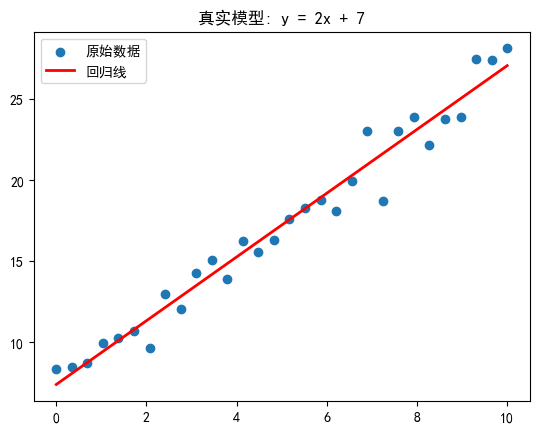

In [217]:
#正规方程应用
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
# 1. 生成模拟数据
x = np.linspace(0, 10, num=30).reshape(-1, 1)  # 生成30个0-10的均匀分布点
w_true = np.random.randint(1, 5, size=1)        # 真实斜率 (1-4随机值)
b_true = np.random.randint(1, 10, size=1)       # 真实截距 (1-9随机值)
y = x * w_true + b_true + np.random.randn(30, 1)  # 添加高斯噪声

# 2. 数据可视化
plt.scatter(x, y, label='原始数据')
plt.title(f'真实模型: y = {w_true[0]}x + {b_true[0]}')

# 3. 构造设计矩阵（添加截距项）
X = np.concatenate([x, np.ones((30, 1))], axis=1)

# 4. 正规方程求解
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

# 5. 结果输出
print(f'真实参数 -> 斜率: {w_true[0]}, 截距: {b_true[0]}')
print(f'估计参数 -> 斜率: {theta[0][0]}, 截距: {theta[1][0]}')

# 6. 回归线绘制
plt.plot(x, X.dot(theta), color='red', linewidth=2, label='回归线')
plt.legend()
plt.show()

真实参数 -> w1: 4, w2: 3, b: 1
估计参数 -> w1: 4.0, w2: 3.0, b: 0.92


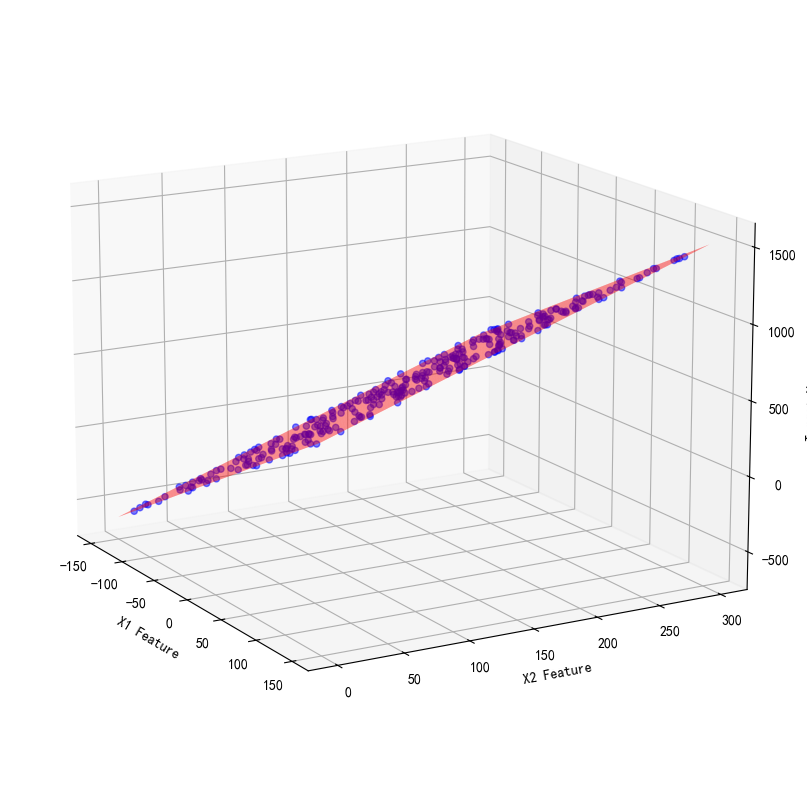

In [227]:
#复杂多元一次方程 二元方程
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 生成模拟数据
np.random.seed(42)
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))
w_true = np.random.randint(1, 5, size=2)  # 真实斜率 [w1, w2]
b_true = np.random.randint(1, 10, size=1) # 真实截距

# 2. 生成带噪声的目标值
y = x1 * w_true[0] + x2 * w_true[1] + b_true + np.random.randn(300, 1)

# 3. 数据可视化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o', alpha=0.5)
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Target Y')
ax.view_init(elev=15, azim=-30)  # 调整视角

# 4. 构造设计矩阵
X = np.concatenate([x1, x2, np.ones((300, 1))], axis=1)

# 5. 正规方程求解
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

# 6. 结果输出
print(f'真实参数 -> w1: {w_true[0]}, w2: {w_true[1]}, b: {b_true[0]}')
print(f'估计参数 -> w1: {theta[0][0]}, w2: {theta[1][0]}, b: {theta[2][0]}')

# 7. 绘制回归平面
x_plane = np.linspace(-150, 150, 100)
y_plane = np.linspace(0, 300, 100)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = theta[0]*X_plane + theta[1]*Y_plane + theta[2]
ax.plot_surface(X_plane, Y_plane, Z_plane, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#scikit-learn库 线性回归
#分类问题、回归问题、聚类问题、降维问题、模型选择问题、数据预处理问题

真实参数 -> 斜率: 3.00, 截距: 4.00
预测参数 -> 斜率: 3.03, 截距: 3.60


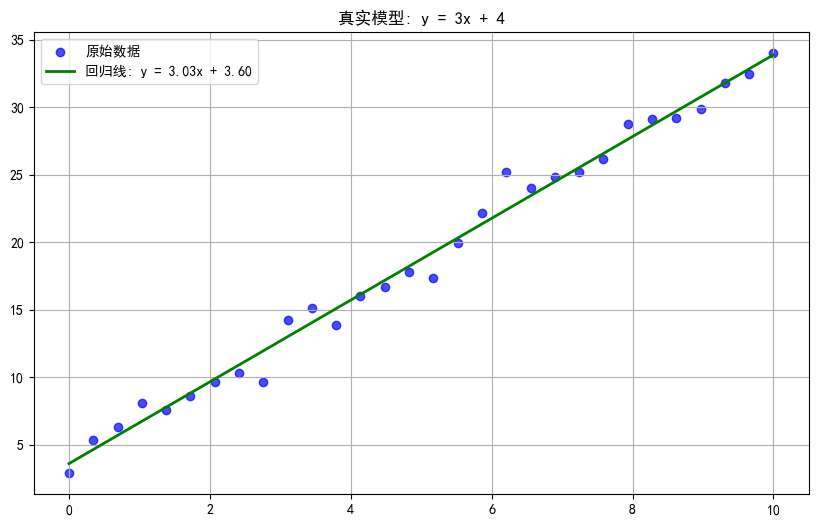

In [228]:
#简单线性回归
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成模拟数据
np.random.seed(42)  # 设置随机种子保证可复现
X = np.linspace(0, 10, num=30).reshape(-1, 1)
w_true = np.random.randint(1, 5, size=1)
b_true = np.random.randint(1, 10, size=1)
y = X * w_true + b_true + np.random.randn(30, 1)

# 2. 数据可视化
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='原始数据', color='blue', alpha=0.7)
plt.title(f'真实模型: y = {w_true[0]}x + {b_true[0]}')

# 3. 建立并训练模型
model = LinearRegression()
model.fit(X, y)  # X需要是二维数组

# 4. 获取模型参数
w_pred = model.coef_[0][0]  # 斜率
b_pred = model.intercept_[0]  # 截距

# 5. 结果输出
print('真实参数 -> 斜率: {:.2f}, 截距: {:.2f}'.format(w_true[0], b_true[0]))
print('预测参数 -> 斜率: {:.2f}, 截距: {:.2f}'.format(w_pred, b_pred))

# 6. 绘制回归线
plt.plot(X, model.predict(X), color='green', linewidth=2, 
         label='回归线: y = {:.2f}x + {:.2f}'.format(w_pred, b_pred))
plt.legend()
plt.grid(True)
plt.show()

真实参数 -> w1: 4, w2: 3, b: 1
估计参数 -> w1: 3.9995263097490463, w2: 3.001245001163021, b: [0.91741104]


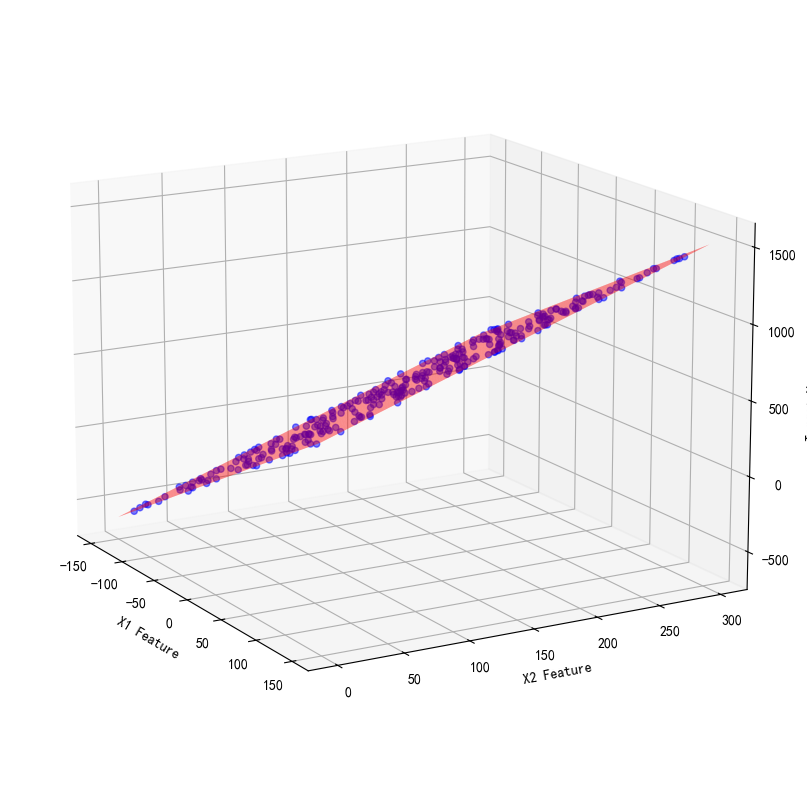

In [239]:
#复杂线性回归
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
# 1. 生成模拟数据
np.random.seed(42)
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))
w_true = np.random.randint(1, 5, size=2)  # 真实斜率 [w1, w2]
b_true = np.random.randint(1, 10, size=1) # 真实截距

# 2. 生成带噪声的目标值
y = x1 * w_true[0] + x2 * w_true[1] + b_true + np.random.randn(300, 1)

# 3. 数据可视化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o', alpha=0.5)
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Target Y')
ax.view_init(elev=15, azim=-30)  # 调整视角

# 4. 构造设计矩阵
X = np.concatenate([x1, x2, np.ones((300, 1))], axis=1)

# 5. 使用sklearn库求解
model = LinearRegression()
model.fit(X, y)  # X需要是二维数组
# 6. 结果输出
w = model.coef_.reshape(-1)
b = model.intercept_
print(f'真实参数 -> w1: {w_true[0]}, w2: {w_true[1]}, b: {b_true[0]}')
print(f'估计参数 -> w1: {w[0]}, w2: {w[1]}, b: {b}')

# 7. 绘制回归平面
x_plane = np.linspace(-150, 150, 100)
y_plane = np.linspace(0, 300, 100)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = w[0]*X_plane + w[1]*Y_plane + b
ax.plot_surface(X_plane, Y_plane, Z_plane, color='r', alpha=0.5)

plt.tight_layout()
plt.show()